In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('../Data/RossmannTrain.csv', parse_dates=True, index_col='Date', low_memory=False)
store = pd.read_csv('../Data/RossmannStore.csv')

In [3]:
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 69.8+ MB


In [5]:
train.shape

(1017209, 8)

In [6]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
train.index

DatetimeIndex(['2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31',
               ...
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01'],
              dtype='datetime64[ns]', name='Date', length=1017209, freq=None)

In [8]:
# Creating features from date 
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.weekofyear

train['SalesPerCustomer'] = train.Sales.div(train.Customers)

In [9]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,SalesPerCustomer
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,844340.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,2.013832e+03,5.846762e+00,1.570279e+01,2.361551e+01,9.493619
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.773960e-01,3.326097e+00,8.787638e+00,1.443338e+01,2.197494
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,1.000000e+00,0.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00,1.100000e+01,7.895563
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01,2.200000e+01,9.250000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,2.014000e+03,8.000000e+00,2.300000e+01,3.500000e+01,10.899729
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01,5.200000e+01,64.957854


In [10]:
# Closed stores
train[(train.Open==0) & (train.Sales==0)].shape

(172817, 13)

In [11]:
# Opened stores with zero sales
train[(train.Open==1) & (train.Sales==0)].shape

(54, 13)

In [12]:
# We want only opened stores with sales not equal to zero
train = train[(train.Open==1) & (train.Sales!=0)]
train.shape

(844338, 13)

In [13]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


- Store: a unique Id for each store
- StoreType: differentiates between 4 different store models: a, b, c, d
- Assortment: describes an assortment level: a = basic, b = extra, c = extended
- CompetitionDistance: distance in meters to the nearest competitor store
- CompetitionOpenSince[Month/Year]: gives the approximate year and month of the time the nearest competitor was opened
- Promo2: Promo2 is a continuing a promotion for some stores: 0 = store is not participating, 1 = store is participating
- Promo2Since[Year/Week]: describes the year and calendar week when the store started participating in Promo2
- PromoInterval: describes the consecutive intervals Promo2 is started, naming the months the promotion is started. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [14]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [15]:
store.shape

(1115, 10)

In [16]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [17]:
# Replacing the competition distance with the median values
store.CompetitionDistance = store.CompetitionDistance.fillna(store.CompetitionDistance.median())

In [18]:
# If there are no values for other features that means there is no nearby competition or promotion. We can replace the missing values with zero
store = store.fillna(0)

In [19]:
store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [20]:
train = train.reset_index().merge(store, on='Store', how='left').set_index('Date')

In [21]:
train.shape

(844338, 22)

In [22]:
train.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear',
       'SalesPerCustomer', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [23]:
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,SalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7,...,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2015-07-31,2,5,6064,625,1,1,0,1,2015,7,...,9.702400,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2015-07-31,3,5,8314,821,1,1,0,1,2015,7,...,10.126675,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,...,9.342457,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
2015-07-31,5,5,4822,559,1,1,0,1,2015,7,...,8.626118,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


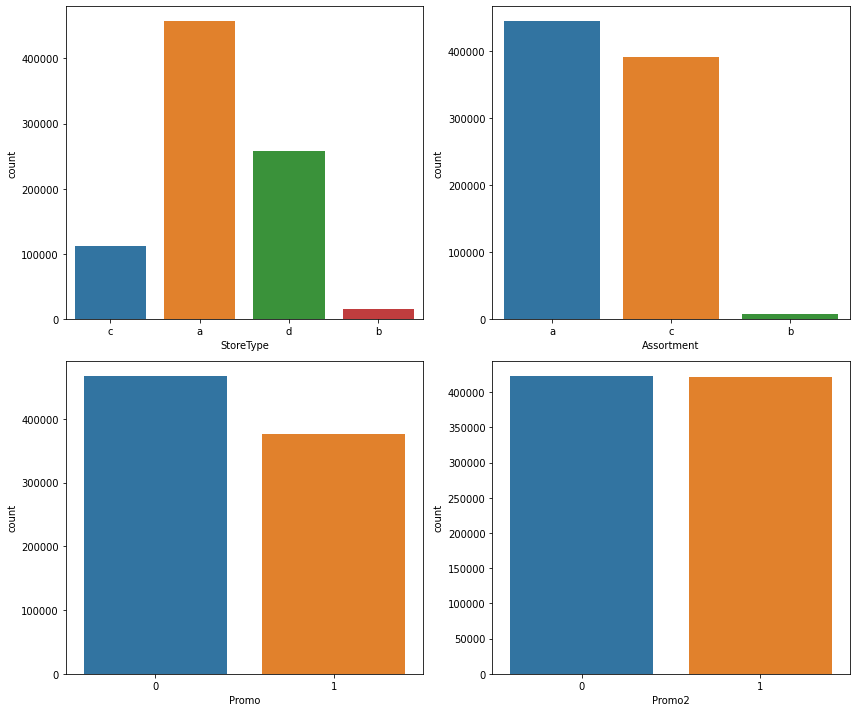

In [24]:
figure, axes = plt.subplots(2, 2, figsize=(12,10))
sns.countplot(ax=axes[0,0],data=train, x='StoreType')
sns.countplot(ax=axes[0,1],data=train, x='Assortment')
sns.countplot(ax=axes[1,0],data=train, x='Promo')
sns.countplot(ax=axes[1,1],data=train, x='Promo2')
plt.tight_layout();

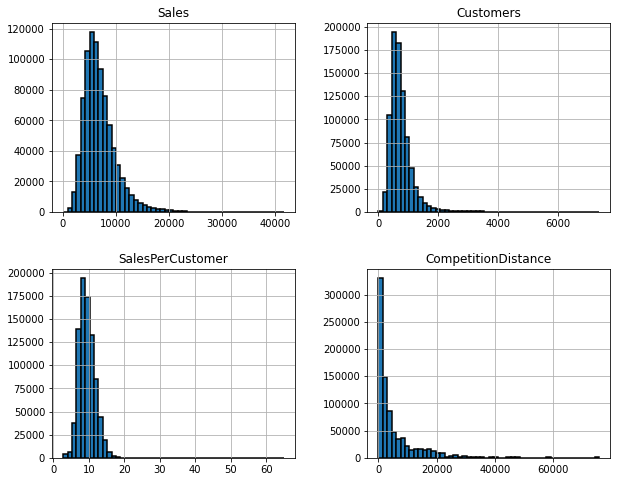

In [25]:
train[['Sales', 'Customers', 'SalesPerCustomer', 'CompetitionDistance']].hist(figsize=(10,8), bins=50, edgecolor='black', linewidth=1.5);

In [26]:
train.groupby('StoreType')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,457042.0,6925.697986,3277.351589,46.0,4695.25,6285.0,8406.00,41551.0
b,15560.0,10233.380141,5155.729868,1252.0,6345.75,9130.0,13184.25,38722.0
c,112968.0,6933.126425,2896.958579,133.0,4916.00,6408.0,8349.25,31448.0
d,258768.0,6822.300064,2556.401455,538.0,5050.00,6395.0,8123.25,38037.0


In [27]:
train.groupby('StoreType')['SalesPerCustomer'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,457042.0,8.846296,1.690913,3.635389,7.611945,8.631363,9.899438,29.877551
b,15560.0,5.133427,1.253988,2.749075,4.039561,4.987022,6.108760,9.203528
c,112968.0,8.626227,1.694325,3.382542,7.416985,8.424736,9.643063,64.957854
d,258768.0,11.277862,1.990706,4.881279,9.873309,11.194977,12.560328,57.614983


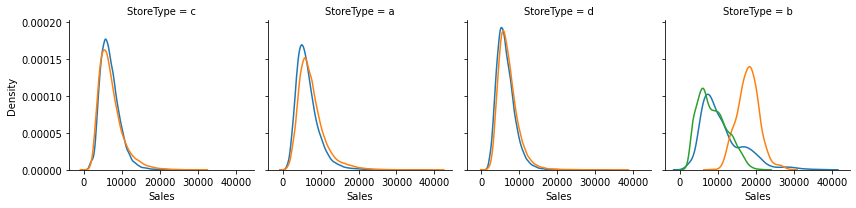

In [64]:
figure = sns.FacetGrid(data=train,col='StoreType', hue='Assortment')
figure.map(sns.distplot, 'Sales', hist=False)
figure.tight_layout();

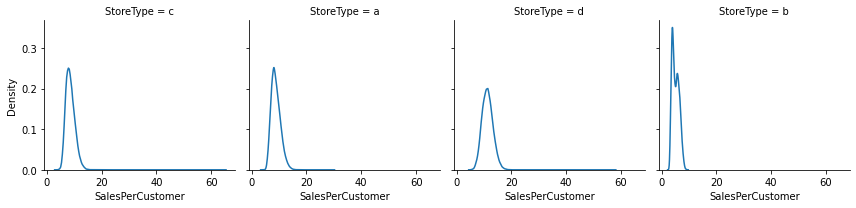

In [65]:
figure = sns.FacetGrid(data=train,col='StoreType')
figure.map(sns.distplot, 'SalesPerCustomer', hist=False)
figure.tight_layout();

In [30]:
train.groupby(['StoreType', 'Assortment'])['SalesPerCustomer'].describe()

count       mean       std       min       25%  \
StoreType Assortment                                                      
a         a           286028.0   8.743313  1.666271  3.635389  7.535817   
          c           171014.0   9.018539  1.717605  4.132372  7.754201   
b         a             6409.0   6.282850  0.832970  3.801695  5.666429   
          b             8209.0   4.163726  0.628182  2.749075  3.712500   
          c              942.0   5.763596  0.484221  4.289030  5.413886   
c         a            58554.0   8.257798  1.501603  3.382542  7.178281   
          c            54414.0   9.022687  1.797310  4.095064  7.737504   
d         a            93884.0  11.050248  1.885812  5.583333  9.747150   
          c           164884.0  11.407464  2.036704  4.881279  9.950673   

                            50%        75%        max  
StoreType Assortment                                   
a         a            8.513166   9.743197  29.877551  
          c            8.836164  10.139756  24.143521  
b         a            6.255941   6.864542   9.203528  
          b            4.079588   4.528232   7.367793  
          c            5.734853   6.093271   7.722051  
c         a            8.094226   9.159186  21.919866  
          c            8.847716  10.127129  64.957854  
d         a           10.996835  12.269053  57.614983  
          c           11.315355  12.733155  25.358779

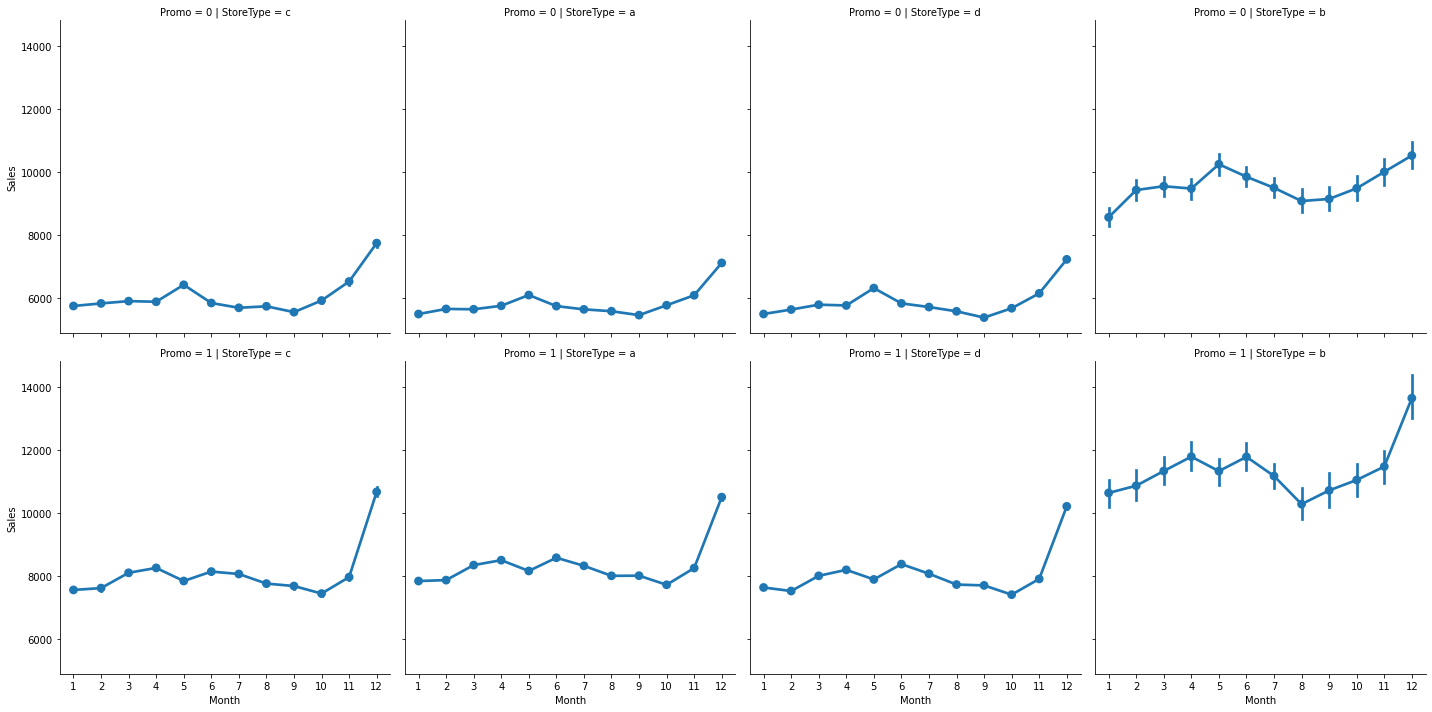

In [31]:
sns.factorplot(data=train, row='Promo', col='StoreType', x='Month', y='Sales')

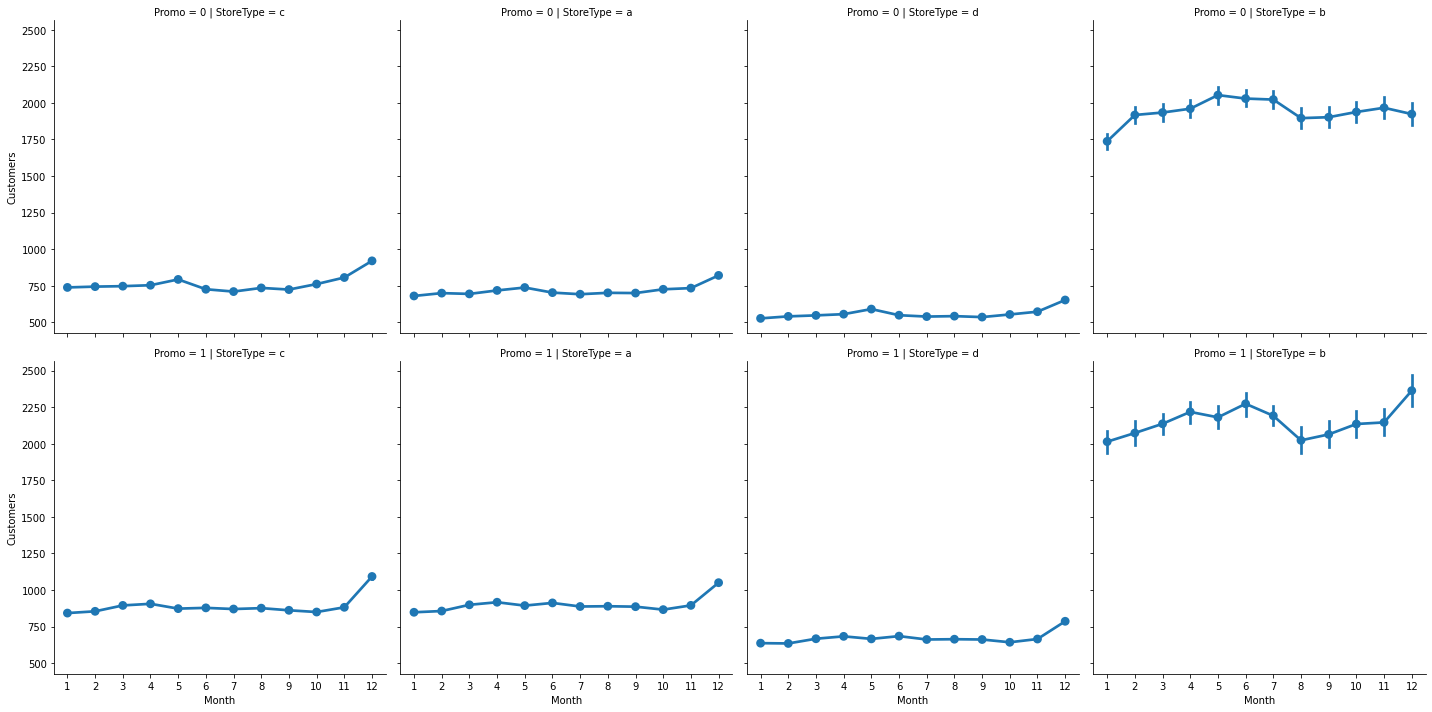

In [32]:
sns.factorplot(data=train, row='Promo', col='StoreType', x='Month', y='Customers')

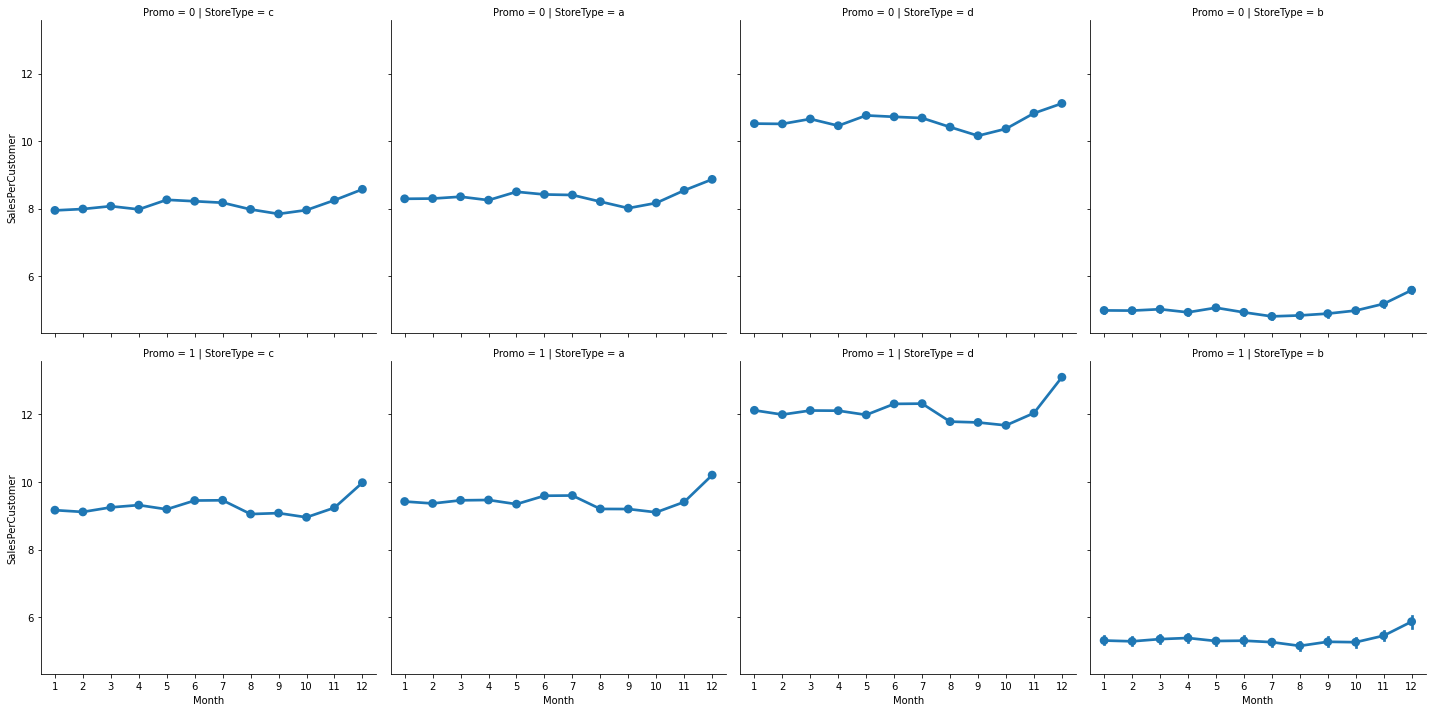

In [33]:
sns.factorplot(data=train, row='Promo', col='StoreType', x='Month', y='SalesPerCustomer')

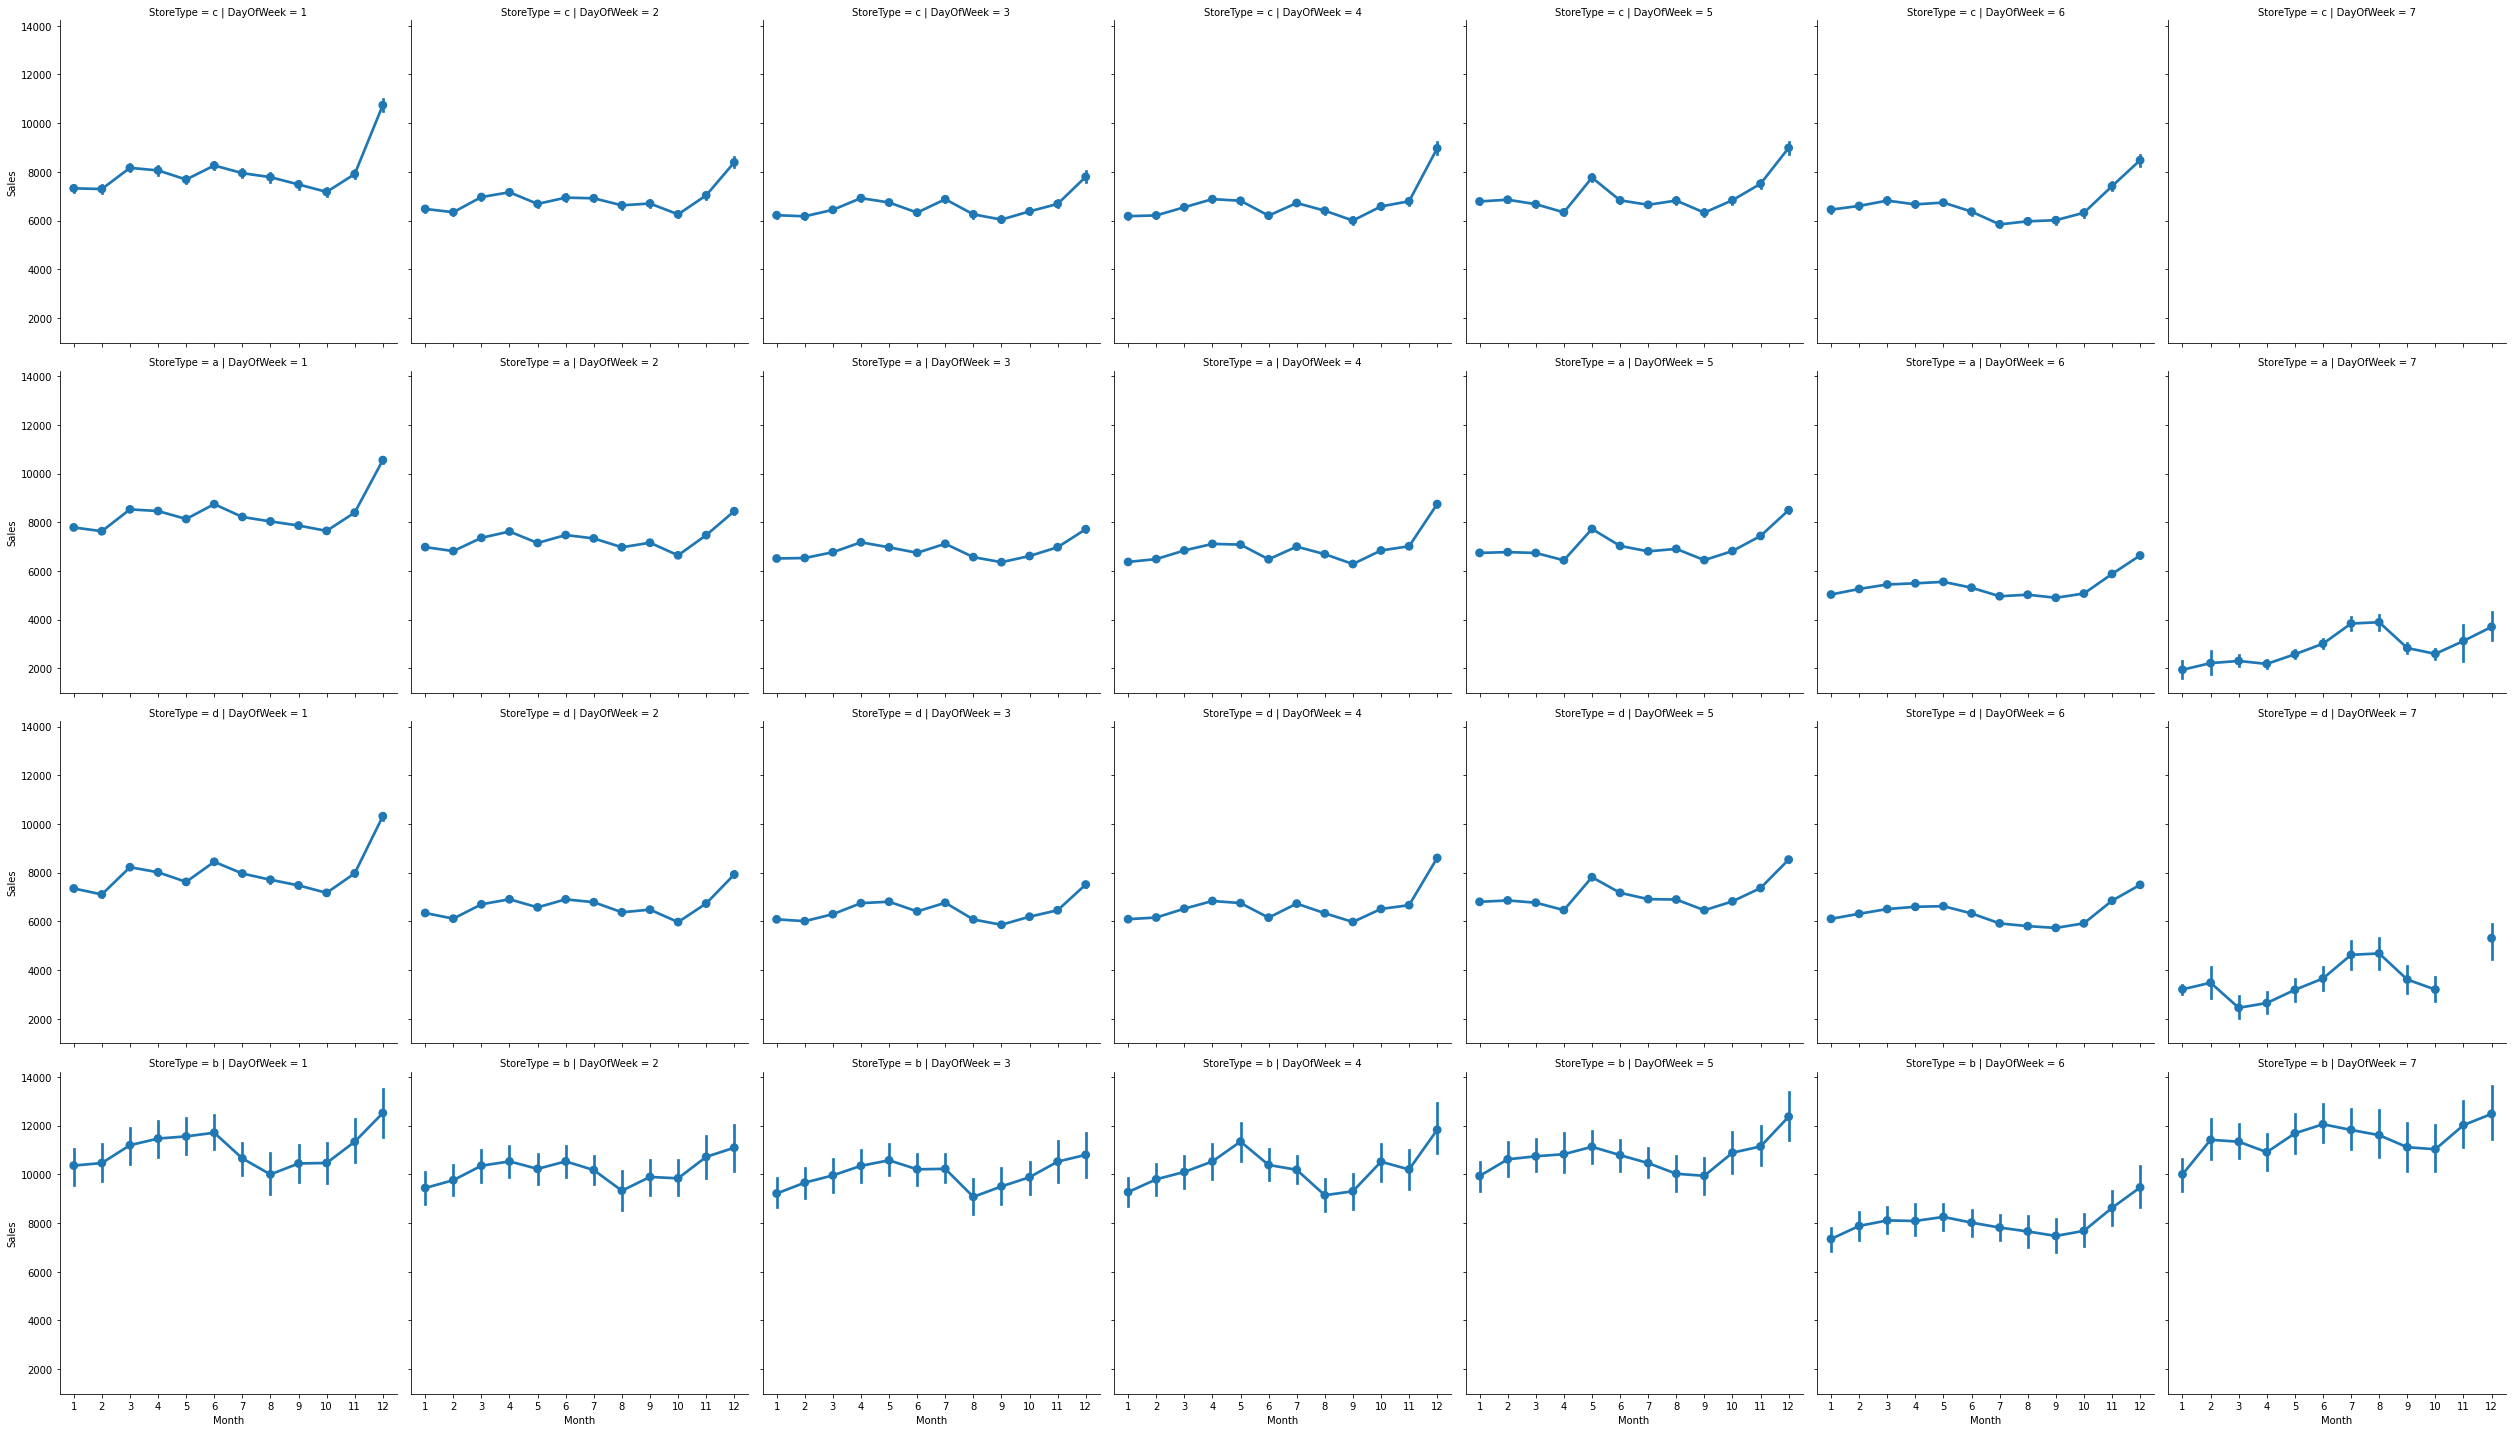

In [34]:
sns.factorplot(data=train, row='StoreType', col='DayOfWeek', x='Month', y='Sales')

In [35]:
# competition open time (in months)
train['CompetitionOpen'] = 12 * (train.Year - train.CompetitionOpenSinceYear) + (train.Month - train.CompetitionOpenSinceMonth)
    
# Promo open time
train['PromoOpen'] = 12 * (train.Year - train.Promo2SinceYear) + (train.WeekOfYear - train.Promo2SinceWeek) / 4.0

# replace NA's by 0
train.fillna(0, inplace = True)

In [36]:
train['CompetitionOpen'] = np.where(train.CompetitionOpenSinceYear==0, 0, train.CompetitionOpen)
train['PromoOpen'] = np.where(train.Promo2SinceYear==0, 0, train.PromoOpen)

In [37]:
train[(train.CompetitionOpenSinceYear==0)].head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,12,5,8959,962,1,1,0,1,2015,7,...,c,1070.0,0.0,0.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0.0,64.50
2015-07-31,13,5,8821,568,1,1,0,0,2015,7,...,a,310.0,0.0,0.0,1,45.0,2009.0,"Feb,May,Aug,Nov",0.0,68.50
2015-07-31,16,5,10231,979,1,1,0,1,2015,7,...,c,3270.0,0.0,0.0,0,0.0,0.0,0,0.0,0.00
2015-07-31,19,5,8234,718,1,1,0,1,2015,7,...,c,3240.0,0.0,0.0,1,22.0,2011.0,"Mar,Jun,Sept,Dec",0.0,50.25
2015-07-31,22,5,6566,633,1,1,0,0,2015,7,...,a,1040.0,0.0,0.0,1,22.0,2012.0,"Jan,Apr,Jul,Oct",0.0,38.25


In [38]:
train[(train.Promo2SinceYear==0)].head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82.0,0.0
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,...,c,620.0,9.0,2009.0,0,0.0,0.0,0,70.0,0.0
2015-07-31,5,5,4822,559,1,1,0,1,2015,7,...,a,29910.0,4.0,2015.0,0,0.0,0.0,0,3.0,0.0
2015-07-31,6,5,5651,589,1,1,0,1,2015,7,...,a,310.0,12.0,2013.0,0,0.0,0.0,0,19.0,0.0
2015-07-31,7,5,15344,1414,1,1,0,1,2015,7,...,c,24000.0,4.0,2013.0,0,0.0,0.0,0,27.0,0.0


In [39]:
# average PromoOpen time and CompetitionOpen time per store type
train[['StoreType', 'Sales', 'Customers', 'PromoOpen', 'CompetitionOpen']].groupby('StoreType').mean()

,Sales,Customers,PromoOpen,CompetitionOpen
StoreType,,,,
a,6925.697986,795.422370,10.958105,43.381276
b,10233.380141,2022.211825,3.717593,38.147815
c,6933.126425,815.538073,13.964386,45.339654
d,6822.300064,606.353935,14.827699,35.294751


<AxesSubplot:>

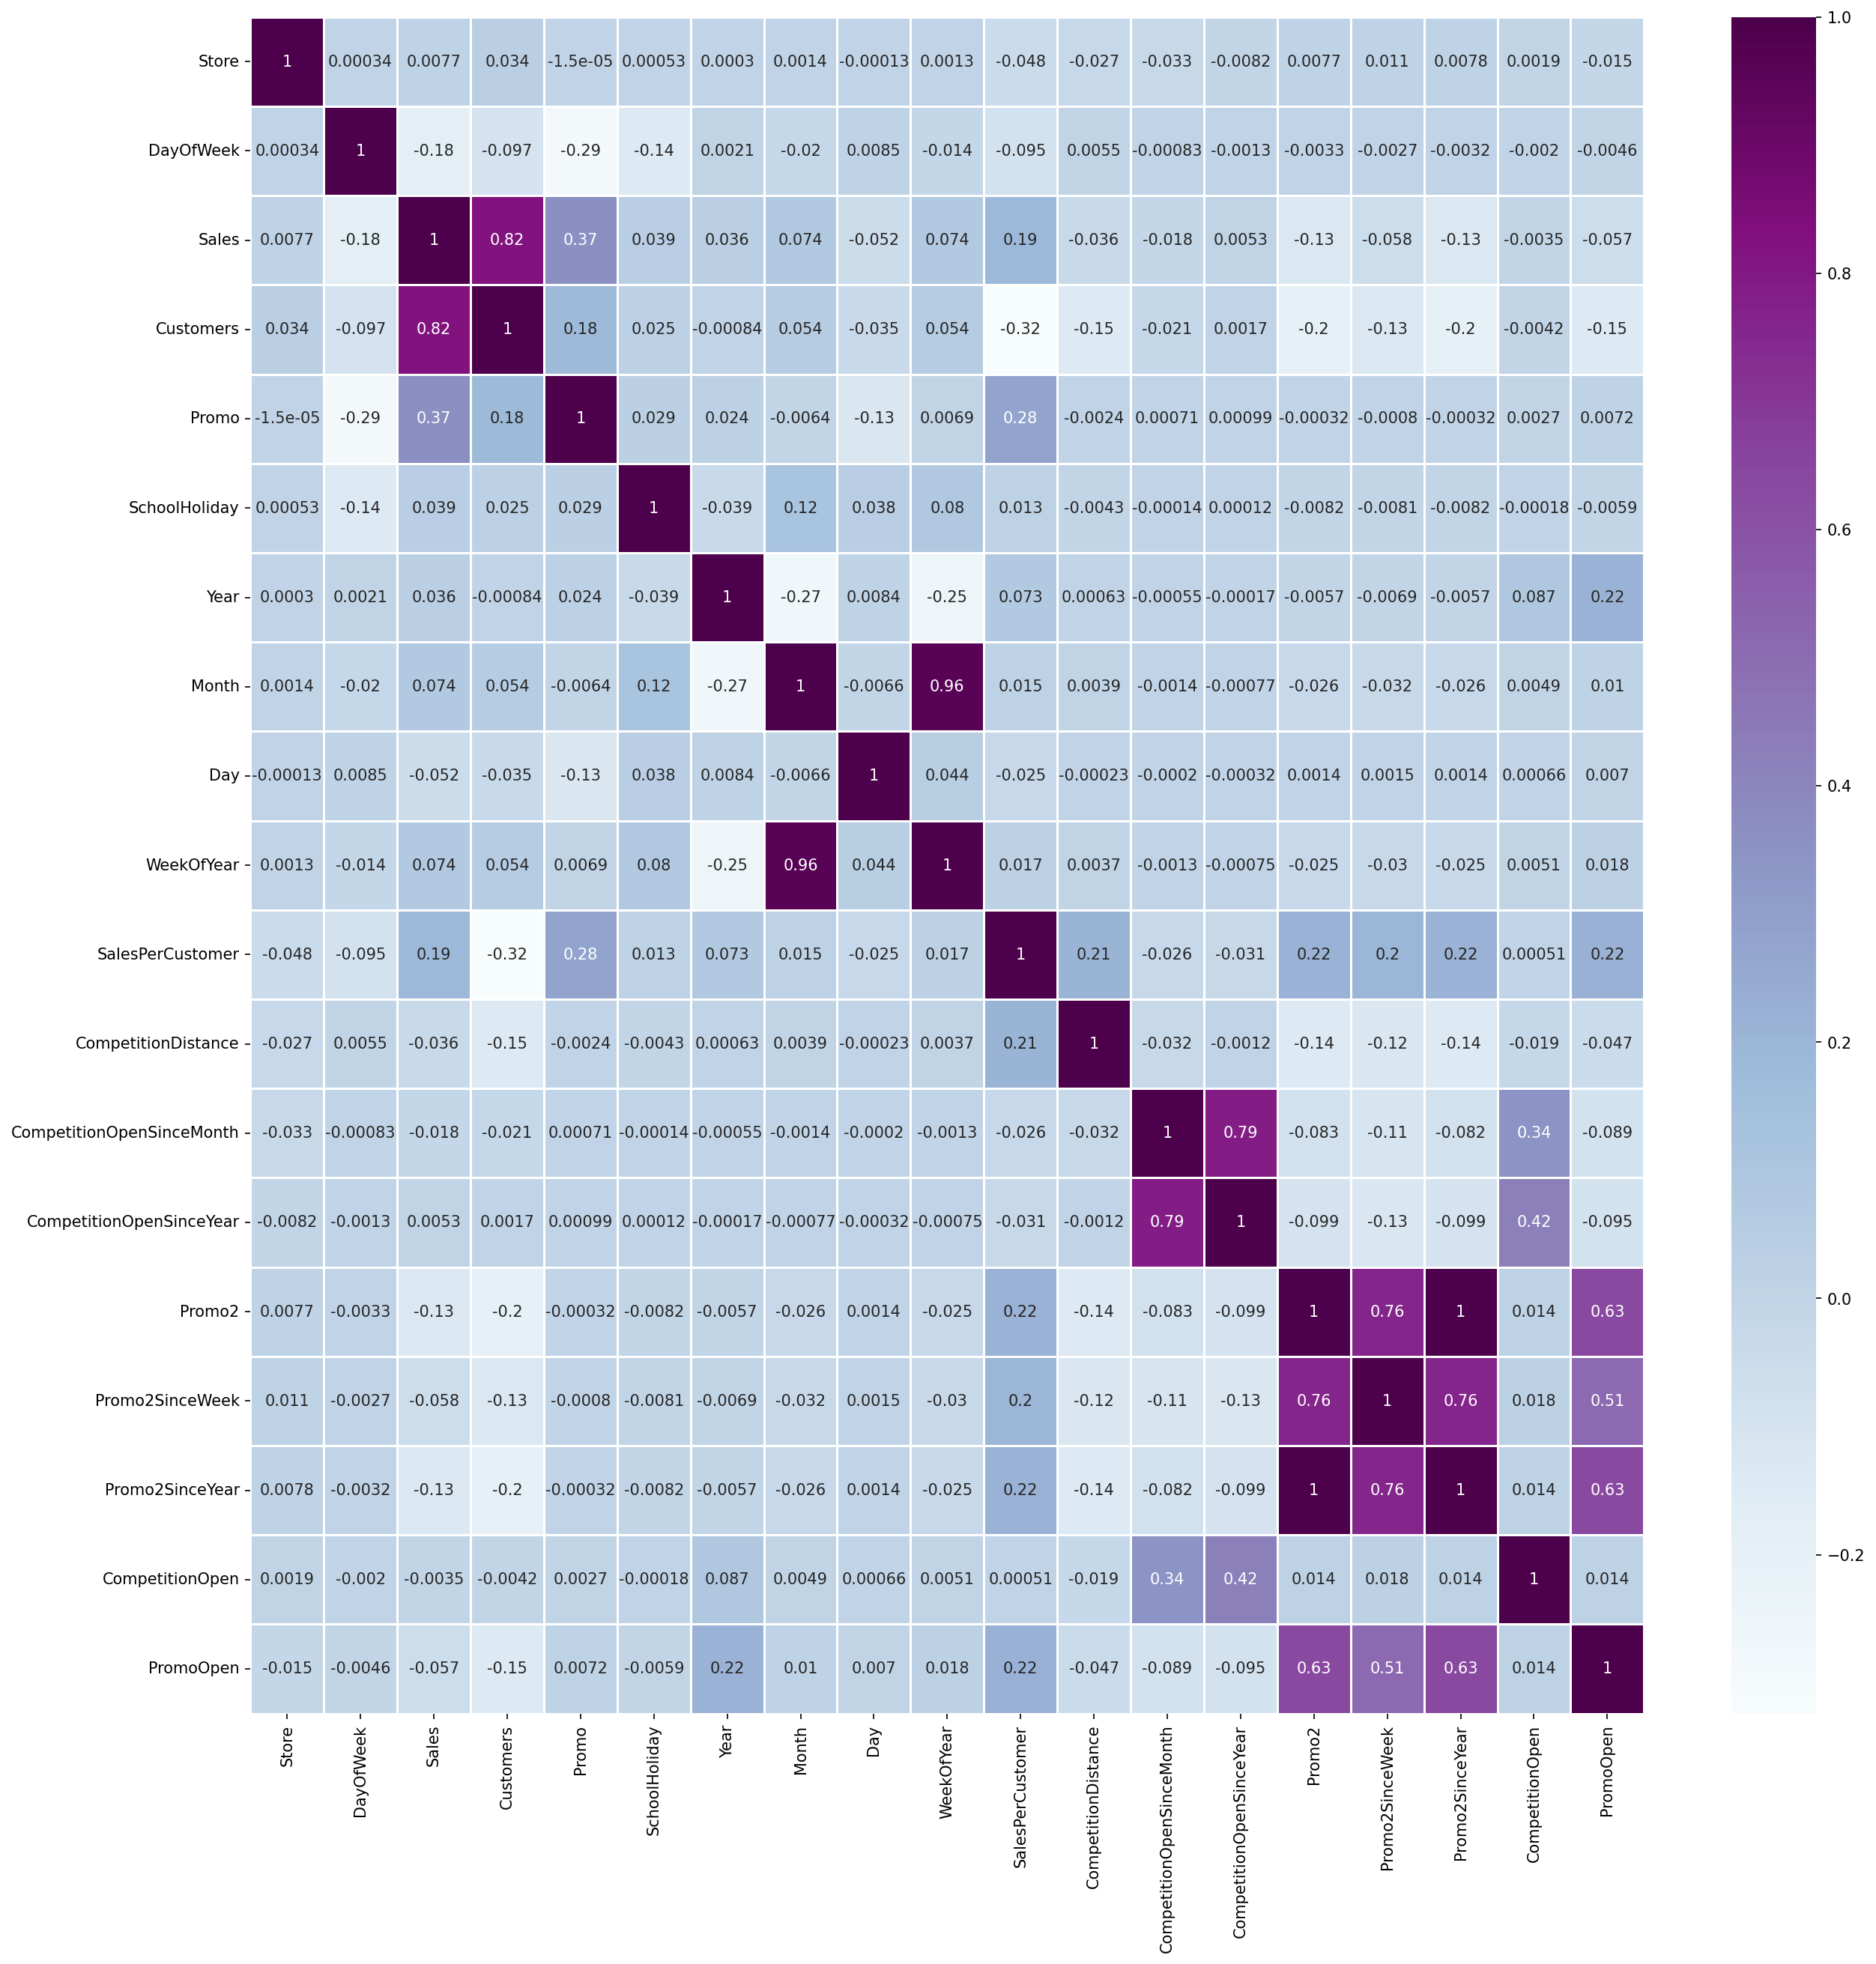

In [40]:
# Correlation analysis
plt.figure(figsize=(20,20), dpi=150)
sns.heatmap(train.drop('Open', axis = 1).corr(), linewidths = .5, cmap = "BuPu", annot=True)   

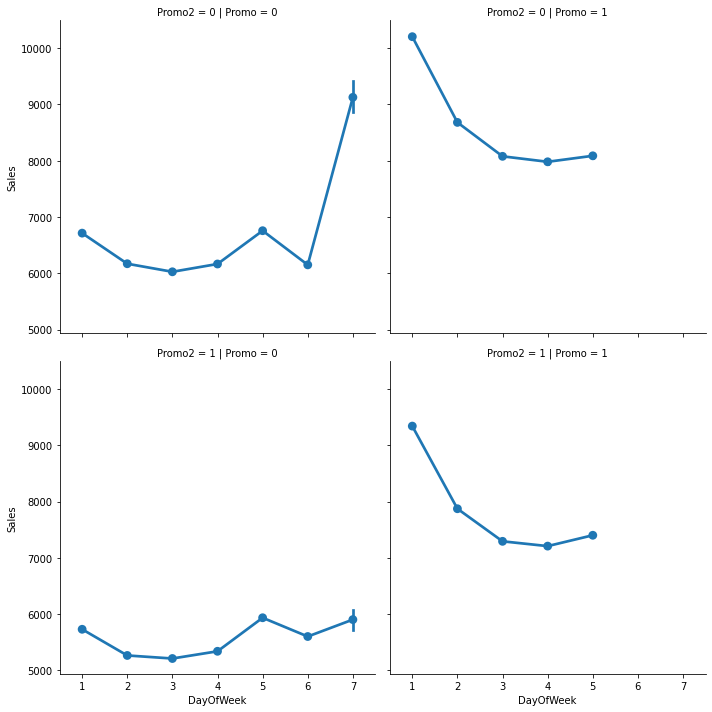

In [41]:
sns.factorplot(data = train, x = 'DayOfWeek', y = "Sales", col = 'Promo', row = 'Promo2') 

Conclusion of EDA
- The most selling and crowded StoreType is A.
- The best "Sale per Customer" StoreType D indicates to the higher Buyer Cart. To benefit from this fact, Rossmann can consider proposing bigger variety of its products.
- Low SalePerCustomer amount for StoreType B indicates to the possible fact that people shop there essentially for "small" things. Eventhough this StoreType generated the least amount of sales and customers over the whole period, it shows a great potential.
- Customers tends to buy more on Modays when there's one promotion (Promo) and on Sundays when there's no promotion at all (both Promo and Promo1 are equal to 0).
- Promo2 alone doesn't seem to be correlated to any significant change in the Sales amount.

In [42]:
# Prophet model for one store

In [74]:
data = train[train.Store == 1]['Sales']

In [75]:
data = data.reset_index()

In [76]:
data.head()

,Date,Sales
0,2015-07-31,5263
1,2015-07-30,5020
2,2015-07-29,4782
3,2015-07-28,5011
4,2015-07-27,6102


In [77]:
data.dtypes

Date     datetime64[ns]
Sales             int64
dtype: object

In [79]:
data = data.rename(columns = {'Date': 'ds','Sales': 'y'})
data = data.sort_values(by='ds')
data.head()

,ds,y
780,2013-01-02,5530
779,2013-01-03,4327
778,2013-01-04,4486
777,2013-01-05,4997
776,2013-01-07,7176


<AxesSubplot:xlabel='ds'>

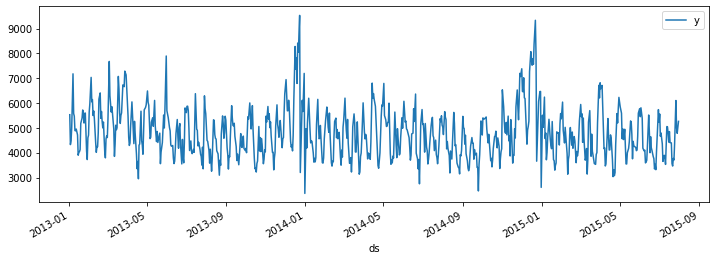

In [85]:
data.set_index('ds').plot(figsize = (12, 4))

In [89]:
train = train.reset_index()

In [94]:
train.StateHoliday.value_counts()

0    843428
a       694
b       145
c        71
Name: StateHoliday, dtype: int64

In [101]:
train.SchoolHoliday.value_counts()

0    680893
1    163445
Name: SchoolHoliday, dtype: int64

In [103]:
state_dates = train[(train.StateHoliday == 'a') | (train.StateHoliday == 'b') | (train.StateHoliday == 'c')]['Date']
school_dates = train[train.SchoolHoliday == 1]['Date']

state = pd.DataFrame({'holiday': 'state_holiday',
                      'ds': pd.to_datetime(state_dates)})
school = pd.DataFrame({'holiday': 'school_holiday',
                      'ds': pd.to_datetime(school_dates)})

holidays = pd.concat((state, school))      

In [104]:
holidays.shape

(164355, 2)

In [105]:
state_dates.shape

(910,)

In [106]:
school_dates.shape

(163445,)

In [107]:
holidays.head()

,holiday,ds
54837,state_holiday,2015-06-04
54838,state_holiday,2015-06-04
54857,state_holiday,2015-06-04
54858,state_holiday,2015-06-04
54860,state_holiday,2015-06-04


In [109]:
from fbprophet import Prophet
model = Prophet(interval_width = 0.95, holidays = holidays)
model.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -8.10439


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1510.17   8.93656e-05       67.0083      0.1868           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     105       1510.18   5.68081e-05        78.418   5.892e-07       0.001      183  LS failed, Hessian reset 
     147       1510.19   4.79185e-05       95.4984   5.105e-07       0.001      272  LS failed, Hessian reset 
     174       1510.19   1.11024e-07       71.8362      0.4306           1      306   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [111]:
future_dates = model.make_future_dataframe(periods = 6*7)
future_dates.tail(7)

,ds
816,2015-09-05
817,2015-09-06
818,2015-09-07
819,2015-09-08
820,2015-09-09
821,2015-09-10
822,2015-09-11


In [113]:
forecast = model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
816,2015-09-05,4092.034043,2392.575761,5727.123776
817,2015-09-06,4086.988821,2516.754081,5713.796726
818,2015-09-07,4161.793901,2451.486980,5775.843291
819,2015-09-08,3664.076887,2053.355137,5344.131068
820,2015-09-09,3550.829069,1941.416670,5138.941377
821,2015-09-10,3462.363550,1805.395641,4981.799961
822,2015-09-11,3717.063878,2042.964851,5310.943784


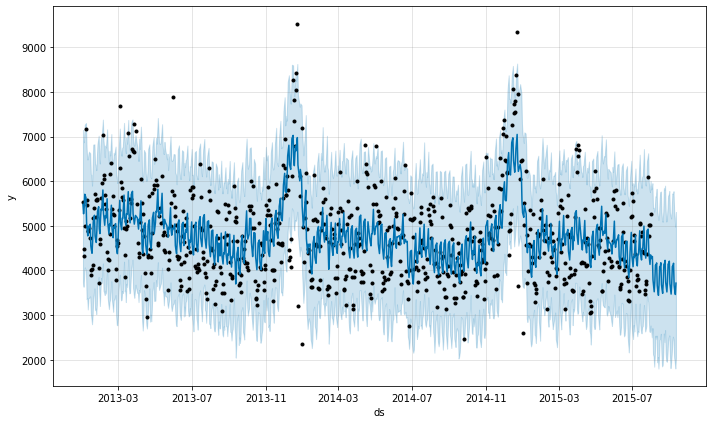

In [116]:
model.plot(forecast);

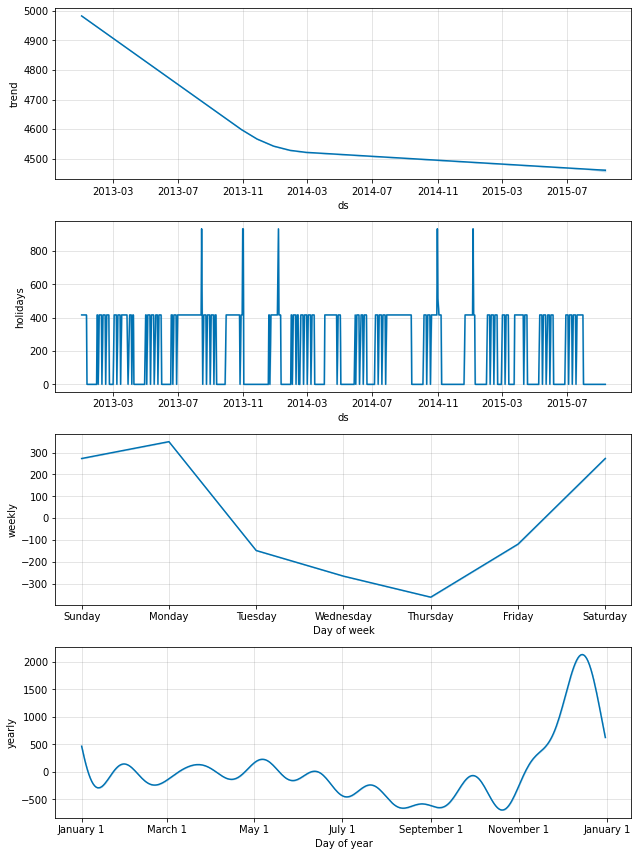

In [119]:
model.plot_components(forecast);